In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

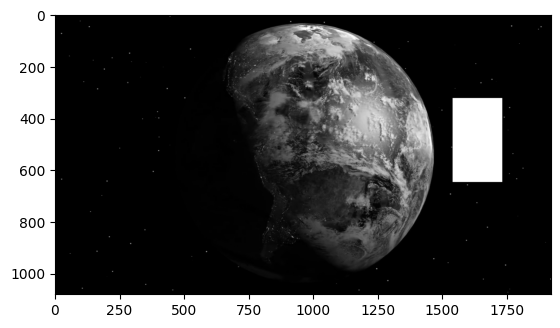

In [7]:
# Opens the Video file
cap= cv2.VideoCapture('globe.mp4')

i=0
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == False:
    break

  # saving each frame as jpg image. Name of the frame starts with 'abc'. Frame number is append
  cv2.imwrite('abc'+str(i)+'.jpg', frame)
  i+=1

# At the end of loop, i is 900. therefore number of frames in video is last value of i
numb_frames=i

# modify some frames of video
strt_fr=int(numb_frames/3)
stp_fr=int(numb_frames*2/3)

#add white square in the frames to be modified
# use first frame to get the size of frames
img = cv2.imread('abc0.jpg', 0)
sh=img.shape

# start and stop row and col numbers to include white square
strt_rw=int(sh[0]*3/10)
stp_rw=int(sh[0]*6/10)
strt_col=int(sh[1]*8/10)
stp_col=int(sh[1]*9/10)

# add white square to the chosen frames
for j in range(strt_fr,stp_fr):
  img = cv2.imread('abc'+str(j)+'.jpg',0)
  img[strt_rw:stp_rw,strt_col:stp_col]=255
  # replace original frame with the modified image/frame
  cv2.imwrite('abc'+str(j)+'.jpg',img)

cap.release()
cv2.destroyAllWindows()

plt.imshow(img,cmap='gray')

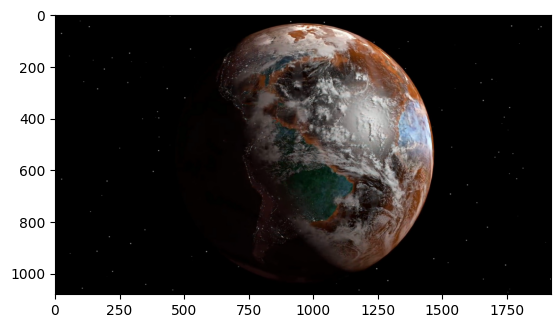

In [8]:
#Create Video from Images

img_array = []
for filename in glob.glob('abc*.jpg'):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('out.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

for i in range(len(img_array)):
  out.write(img_array[i])

out.release()

plt.imshow(img_array[i])